### data download & unzip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ln -s /mydrive/bcdfghi /bcdfghi
!ls /bcdfghi

ls: cannot access '/aes': No such file or directory


In [3]:
!ls '/bcdfghi/Input_dataset'

B  C  D  F  G  H  I


In [4]:
!ls '/bcdfghi/processed_data'

In [ ]:
!unzip /aes/S.zip -d /aes/Input_dataset


Archive:  /aes/S.zip
  inflating: /aes/Input_dataset/S/S1.jpg  
  inflating: /aes/Input_dataset/S/S10.jpg  
  inflating: /aes/Input_dataset/S/S100.jpg  
  inflating: /aes/Input_dataset/S/S1000.jpg  
  inflating: /aes/Input_dataset/S/S1001.jpg  
  inflating: /aes/Input_dataset/S/S1002.jpg  
  inflating: /aes/Input_dataset/S/S1003.jpg  
  inflating: /aes/Input_dataset/S/S1004.jpg  
  inflating: /aes/Input_dataset/S/S1005.jpg  
  inflating: /aes/Input_dataset/S/S1006.jpg  
  inflating: /aes/Input_dataset/S/S1007.jpg  
  inflating: /aes/Input_dataset/S/S1008.jpg  
  inflating: /aes/Input_dataset/S/S1009.jpg  
  inflating: /aes/Input_dataset/S/S101.jpg  
  inflating: /aes/Input_dataset/S/S1010.jpg  
  inflating: /aes/Input_dataset/S/S1011.jpg  
  inflating: /aes/Input_dataset/S/S1012.jpg  
  inflating: /aes/Input_dataset/S/S1013.jpg  
  inflating: /aes/Input_dataset/S/S1014.jpg  
  inflating: /aes/Input_dataset/S/S1015.jpg  
  inflating: /aes/Input_dataset/S/S1016.jpg  
  inflating: /aes/In

In [ ]:
!unzip /grr/L.zip -d /grr/Input_dataset
!unzip /grr/M.zip -d /grr/Input_dataset
!unzip /grr/O.zip -d /grr/Input_dataset
!unzip /grr/P.zip -d /grr/Input_dataset
!unzip /grr/Q.zip -d /grr/Input_dataset
!unzip /grr/R.zip -d /grr/Input_dataset

In [ ]:
!unzip /grr/A.zip -d /grr/Input_dataset
!unzip /grr/B.zip -d /grr/Input_dataset
!unzip /grr/C.zip -d /grr/Input_dataset
!unzip /grr/D.zip -d /grr/Input_dataset
!unzip /grr/E.zip -d /grr/Input_dataset
!unzip /grr/F.zip -d /grr/Input_dataset
!unzip /grr/G.zip -d /grr/Input_dataset
!unzip /grr/H.zip -d /grr/Input_dataset
!unzip /grr/I.zip -d /grr/Input_dataset
!unzip /grr/K.zip -d /grr/Input_dataset
!unzip /grr/L.zip -d /grr/Input_dataset
!unzip /grr/M.zip -d /grr/Input_dataset
!unzip /grr/O.zip -d /grr/Input_dataset
!unzip /grr/P.zip -d /grr/Input_dataset
!unzip /grr/Q.zip -d /grr/Input_dataset
!unzip /grr/R.zip -d /grr/Input_dataset

In [ ]:
!ls /grr/Input_dataset

A  B  C  D  E  F  G  H	I  K  L  M  O  P  Q  R


In [ ]:
!unzip /Allphabet_dataset/Q.zip -d /Allphabet_dataset/Input_dataset
!unzip /Allphabet_dataset/P.zip -d /Allphabet_dataset/Input_dataset
!unzip /Allphabet_dataset/R.zip -d /Allphabet_dataset/Input_dataset
!unzip /Allphabet_dataset/T.zip -d /Allphabet_dataset/Input_dataset
!unzip /Allphabet_dataset/U.zip -d /Allphabet_dataset/Input_dataset
!unzip /Allphabet_dataset/S.zip -d /Allphabet_dataset/Input_dataset

### data split

In [5]:
!pip install split_folders

In [6]:
import splitfolders

In [7]:
input_folder = "/bcdfghi/Input_dataset"
output = "/bcdfghi/processed_data"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.6,.2,.2))

Copying files: 21000 files [1:29:31,  3.91 files/s]


In [ ]:
!ls /grr/processed_data

test  train  val


In [ ]:
!ls /mydrive/grr

 A.zip	 D.zip	 grr	 Input_dataset	 L.zip	 processed_data        Q.zip
 B.zip	 E.zip	 G.zip	 I.zip		 M.zip	'processed_data (1)'   R.zip
 C.zip	 F.zip	 H.zip	 K.zip		 O.zip	 P.zip


###Resnet

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = "/Allphabet_dataset/processed_data/train"
valid_data_dir = "/Allphabet_dataset/processed_data/val"
test_data_dir = "/Allphabet_dataset/processed_data/test"

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2700 images belonging to 15 classes.
Found 600 images belonging to 15 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 600 images belonging to 15 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 10)

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/10
85/85 [==============================] - 320s 4s/step - loss: 1.6556 - accuracy: 0.6486
Epoch 2/10
85/85 [==============================] - 321s 4s/step - loss: 0.0168 - accuracy: 0.9994
Epoch 3/10
85/85 [==============================] - 320s 4s/step - loss: 0.0085 - accuracy: 0.9998
Epoch 4/10
85/85 [==============================] - 321s 4s/step - loss: 0.0049 - accuracy: 1.0000
Epoch 5/10
85/85 [==============================] - 320s 4s/step - loss: 0.0028 - accuracy: 1.0000
Epoch 6/10
85/85 [==============================] - 321s 4s/step - loss: 0.0023 - accuracy: 1.0000
Epoch 7/10
85/85 [==============================] - 323s 4s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
85/85 [==============================] - 323s 4s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/10
85/85 [==============================] - 326s 4s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
85/85 [=========================

In [ ]:
model.save('Allphabet_dataset/Saved_model/ResNet50_Alphabet.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy: ",test_acc)

600/600 - 83s - loss: 0.1049 - accuracy: 0.9583

Test accuracy:  0.9583333134651184


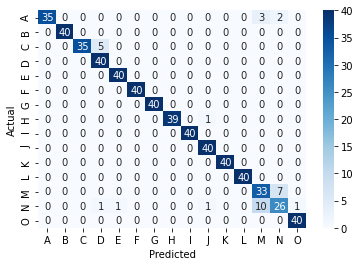

test accuracy : 94.66666666666667


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('Allphabet_dataset/Saved_model/ResNet50_Alphabet.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))